In [1]:
import s3fs
import pandas as pd

In [2]:
# Information d'accès au cloud MinIO (Bucket de William)
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})
MY_BUCKET = "williamolivier"

In [3]:
# Vérification du contenu
fs.ls(f"{MY_BUCKET}/diffusion")

['williamolivier/diffusion/df_dossier_complet_brut.csv',
 'williamolivier/diffusion/df_indicateurs_dep.csv',
 'williamolivier/diffusion/df_indicateurs_nat.csv',
 'williamolivier/diffusion/df_loda.csv',
 'williamolivier/diffusion/df_meta_dossier_complet_brut.csv',
 'williamolivier/diffusion/df_meta_mobpro_brut.csv',
 'williamolivier/diffusion/df_mobpro_brut.csv']

In [4]:
# Récupération des tableaux
FILE_PATH_S3_DCB = f"{MY_BUCKET}/diffusion/df_dossier_complet_brut.csv"
with fs.open(FILE_PATH_S3_DCB, "rb") as file:
    df_dossier_complet_brut = pd.read_csv(file)

# Récupération des tableaux
FILE_PATH_S3_MDCB = f"{MY_BUCKET}/diffusion/df_meta_dossier_complet_brut.csv"
with fs.open(FILE_PATH_S3_MDCB, "rb") as file:
    df_meta_dossier_complet_brut = pd.read_csv(file)

# Récupération des tableaux
FILE_PATH_S3_MB = f"{MY_BUCKET}/diffusion/df_mobpro_brut.csv"
with fs.open(FILE_PATH_S3_MB, "rb") as file:
    df_mobpro_brut = pd.read_csv(file)

# Récupération des tableaux
FILE_PATH_S3_MMB = f"{MY_BUCKET}/diffusion/df_meta_mobpro_brut.csv"
with fs.open(FILE_PATH_S3_MMB, "rb") as file:
    df_meta_mobpro_brut = pd.read_csv(file)

/tmp/ipykernel_10762/1657827963.py:4: DtypeWarning: Columns (1,1687,1688) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dossier_complet_brut = pd.read_csv(file)
/tmp/ipykernel_10762/1657827963.py:9: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta_dossier_complet_brut = pd.read_csv(file)
/tmp/ipykernel_10762/1657827963.py:14: DtypeWarning: Columns (1,2,3,4,14,15,16,18,22,24,27,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mobpro_brut = pd.read_csv(file)


In [5]:
df_mobpro_brut.sample()

,Unnamed: 0,COMMUNE,ARM,DCFLT,DCLT,AGEREVQ,CS1,DEROU,DIPL,EMPL,...,REGION,REGLT,SEXE,STAT,STOCD,TP,TRANS,TYPL,TYPMR,VOIT
55886,55886,1354,ZZZZZ,SUC1U,99999,25,3,Z,19,15,...,84,99,2,10,23,1,5,2,12,1


In [6]:
# Homogénéisation des codes insee (tous en chaîne de caractère)
df_mobpro_brut["COMMUNE"] = df_mobpro_brut["COMMUNE"].astype(str).str.zfill(5)
df_mobpro_brut["DCLT"] = df_mobpro_brut["DCLT"].astype(str).str.zfill(5)
df_mobpro_brut["ARM"] = df_mobpro_brut["ARM"].astype(str).str.zfill(5)

Ce que signifient chacune des en-têtes de colonnes :  
COMMUNE Département et commune du lieu de résidence  
ARM Arrondissement municipal de résidence (Paris, Lyon et Marseille)  
DCFLT Commune frontalière du lieu de travail  
DCLT Département, commune et arrondissement municipal (Paris, Lyon, Marseille) du lieu de travail  
AGEREVQ Âge quinquennal en années révolues  
CS1 Catégorie socioprofessionnelle en 8 postes  
DEROU Nombre de deux-roues à moteur du ménage (DOM)  
DIPL_15 Diplôme le plus élevé  
EMPL Condition d'emploi  
ILTUU Indicateur urbain du lieu de travail  
ILT Indicateur du lieu de travail  
IMMI Situation quant à l'immigration  
INATC Indicateur de nationalité condensé (Français/Étranger)  
INEEM Nombre d'élèves, étudiants ou stagiaires âgés de 14 ans ou plus du ménage  
INPOM Nombre de personnes actives ayant un emploi du ménage  
INPSM Nombre de personnes scolarisées du ménage  
IPONDI Poids de l'individu  
LPRM Lien à la personne de référence du ménage  
METRODOM Indicateur Métropole ou DOM du lieu de résidence  
MOCO Mode de cohabitation  
NA5 Activité économique regroupée en 5 postes  
NPERR Nombre de personnes du ménage (regroupé)  
REGION Région du lieu de résidence  
REGLT Région du lieu de travail  
SEXE Sexe  
STAT Statut professionnel  
STOCD Statut d'occupation détaillé du logement  
TP Temps de travail  
TRANS Mode de transport principal le plus souvent utilisé pour aller travailler  
TYPL Type de logement  
TYPMR Type de ménage regroupé (en 9 postes)  
VOIT Nombre de voitures du ménage  

La fonction ci-dessous permet d'obtenir un premier tableau regroupant ceratines informations par commune :
- Nombre de personnes du ménage (regroupé)
- Nombre de personnes scolarisées du ménage
- Nombre de personnes actives ayant un emploi du ménage
- Nombre d'élèves, étudiants ou stagiaires âgés de 14 ans ou plus du ménage
- Indicateur du lieu de travail
(1 Dans la commune de résidence actuelle
2 Dans une autre commune du département de résidence
3 Dans un autre département de la région de résidence
4 Hors de la région de résidence actuelle : en métropole
5 Hors de la région de résidence actuelle : dans un DOM
6 Hors de la région de résidence actuelle : dans une COM
7 A l'étranger)

In [7]:
# Conversion des colonnes en numérique
df_mobpro_brut['NPERR'] = pd.to_numeric(df_mobpro_brut['NPERR'], errors='coerce')
df_mobpro_brut['INPSM'] = pd.to_numeric(df_mobpro_brut['INPSM'], errors='coerce')
df_mobpro_brut['INPOM'] = pd.to_numeric(df_mobpro_brut['INPOM'], errors='coerce')
df_mobpro_brut['INEEM'] = pd.to_numeric(df_mobpro_brut['INEEM'], errors='coerce')

# Création des agrégations de base
mobpro_villes = df_mobpro_brut.groupby('COMMUNE').agg({
    'NPERR': 'sum',
    'INPSM': 'sum',
    'INPOM': 'sum',
    'INEEM': 'sum'})

# Créons d'abord un DataFrame temporaire pour chaque valeur d'ILT
for i in range(1, 8):
    # Grouper par COMMUNE et compter les occurrences où ILT == str(i)
    temp_count = df_mobpro_brut[df_mobpro_brut['ILT'] == i].groupby('COMMUNE').size()
    # Ajouter cette série au DataFrame principal
    mobpro_villes[f'ILT_{i}'] = temp_count

# Remplir les valeurs manquantes (NaN) par 0
mobpro_villes = mobpro_villes.fillna(0)

# Réinitialisation de l'index
mobpro_villes = mobpro_villes.reset_index()


In [8]:
mobpro_villes

,COMMUNE,NPERR,INPSM,INPOM,INEEM,ILT_1,ILT_2,ILT_3,ILT_4,ILT_5,ILT_6,ILT_7
0,01001,275.0,65.0,194.0,13.0,11.0,58.0,20.0,1.0,0.0,0.0,0.0
1,01002,70.0,28.0,41.0,2.0,4.0,15.0,3.0,1.0,0.0,0.0,0.0
2,01004,6481.0,1787.0,3854.0,469.0,894.0,1105.0,422.0,33.0,0.0,0.0,5.0
3,01005,522.0,148.0,335.0,40.0,31.0,49.0,96.0,1.0,0.0,0.0,0.0
4,01006,35.0,4.0,31.0,0.0,1.0,7.0,5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34834,97420,10024.0,2862.0,5415.0,993.0,1044.0,2059.0,0.0,8.0,6.0,0.0,1.0
34835,97421,1158.0,319.0,552.0,88.0,215.0,120.0,0.0,1.0,0.0,0.0,0.0
34836,97422,28947.0,8288.0,15580.0,2587.0,5349.0,4140.0,0.0,35.0,10.0,3.0,0.0
34837,97423,1489.0,352.0,813.0,144.0,157.0,297.0,0.0,3.0,0.0,0.0,0.0


# Matrice des flux

On souhaite créer une matrice des flux pour avoir une vision générale des trajets domicile-travail quotidiens entre les villes. Pour chaque couple de ville, le nombre correspondant dans la matrice correspond au nombre de commute effectué de la ville 1 à la ville 2.

On remarque que pour la variable "COMMUNE" (commune de résidence) on a uniquement 75056 pour Paris (idem pour Lyon et Marseille), tandis que pour la variable "DCLT" (commune de travail) on a un découpage en arrondissement avec les codes 75101,... pour Paris (idem pour Lyon et Marseille). Afin de pallier cette différence, on se cale sur l'échelle des arrondissements en remplaçant la valeur de "COMMUNE" par celle de "ARM" lorsque la ville en question est Paris, Marseille ou Lyon.

In [9]:
# On vérifie qu'il y a autant de lignes avec un arrondissement indiqué et de lignes dont la ville de résidence est soit Paris, soit Marseille, soit Lyon (cohérence entre "ARM" et "COMMUNE")
assert len(df_mobpro_brut[df_mobpro_brut['ARM']!="ZZZZZ"])== len(df_mobpro_brut[
    (df_mobpro_brut['COMMUNE'] == '75056') | 
    (df_mobpro_brut['COMMUNE'] == '13055') | 
    (df_mobpro_brut['COMMUNE'] == '69123')])

# Liste des codes insee d'arrondissements
arr_paris = [f"751{str(i).zfill(2)}" for i in range(1, 21)]
arr_marseille = [f"132{str(i).zfill(2)}" for i in range(1, 17)]
arr_lyon = [f"6938{str(i).zfill(1)}" for i in range(1, 10)]

In [10]:
df_mobpro_brut.loc[
    df_mobpro_brut['COMMUNE'].isin(['75056', '13055', '69123']), 'COMMUNE'
] = df_mobpro_brut['ARM']

On établit maintenant la matrice des flux.

In [11]:
# Création d'une table croisée dynamique pour compter les déplacements
flux_tot = pd.crosstab(df_mobpro_brut['COMMUNE'], df_mobpro_brut['DCLT'])

# Conversion en DataFrame pour plus de clarté
flux_tot = pd.DataFrame(flux_tot)

# En option, si on veut réinitialiser l'index pour avoir COMMUNE en colonne :
# flux_tot = flux_tot.reset_index()

# Pour voir les dimensions de la matrice
print("Dimensions de la matrice :", flux_tot.shape)


# Filtrer les données pour chaque groupe de transport
df_trans_45 = df_mobpro_brut[df_mobpro_brut['TRANS'].isin([4, 5])]
df_trans_6 = df_mobpro_brut[df_mobpro_brut['TRANS'] == 6]
df_trans_123 = df_mobpro_brut[df_mobpro_brut['TRANS'].isin([1, 2, 3])]

# Créer les matrices des flux pour chaque groupe
flux_rouge = pd.crosstab(df_trans_45['COMMUNE'], df_trans_45['DCLT'])
flux_jaune = pd.crosstab(df_trans_6['COMMUNE'], df_trans_6['DCLT'])
flux_vert = pd.crosstab(df_trans_123['COMMUNE'], df_trans_123['DCLT'])

# Convertir en DataFrame pour plus de clarté
flux_rouge = pd.DataFrame(flux_rouge)
flux_jaune = pd.DataFrame(flux_jaune)
flux_vert = pd.DataFrame(flux_vert)

# Afficher les dimensions des matrices
print("Dimensions de la matrice (TRANS = 4 ou 5) :", flux_rouge.shape)
print("Dimensions de la matrice (TRANS = 6) :", flux_jaune.shape)
print("Dimensions de la matrice (TRANS = 1, 2 ou 3) :", flux_vert.shape)


Dimensions de la matrice : (34881, 34078)
Dimensions de la matrice (TRANS = 4 ou 5) : (34817, 33012)
Dimensions de la matrice (TRANS = 6) : (17600, 10140)
Dimensions de la matrice (TRANS = 1, 2 ou 3) : (30250, 29908)


In [12]:
flux_tot

DCLT,01001,01002,01004,01005,01006,01007,01008,01009,01010,01011,...,98803,98805,98807,98809,98811,98814,98815,98818,98822,99999
COMMUNE,,,,,,,,,,,,,,,,,,,,,
01001,11,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01002,0,4,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01004,0,0,894,0,0,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
01005,0,0,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01006,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
97421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def flux(ville_a,ville_b):
    flux = flux_tot.loc[ville_a, ville_b]
    print(f"Nombre de personnes se déplaçant de {ville_a} vers {ville_b} : {flux}")

## Prend en arg deux codes insee en chaîne de caractère et renvoie le nombre de commute entre ces deux villes

In [16]:
flux('78220', '75108')

Nombre de personnes se déplaçant de 78220 vers 75108 : 4


In [18]:
# Top 10 des villes générant le plus de déplacements
top_villes_depart = flux_tot.sum(axis=1).sort_values(ascending=False).head(10)
top_villes_arrivee = flux_tot.sum(axis=0).sort_values(ascending=False).head(10)

print("Top 10 villes de départ :\n", top_villes_depart)
print("Top 10 villes d'arrivée :\n", top_villes_arrivee)



Top 10 villes de départ :
 COMMUNE
31555    81322
44109    52702
06088    51327
33063    45227
75115    44059
34172    42472
67482    42271
75118    39633
59350    36575
75120    36077
dtype: int64
Top 10 villes d'arrivée :
 DCLT
99999    118949
31555    104941
75115     70649
75108     68148
44109     66757
33063     66460
59350     56677
67482     54320
06088     54121
34172     52297
dtype: int64


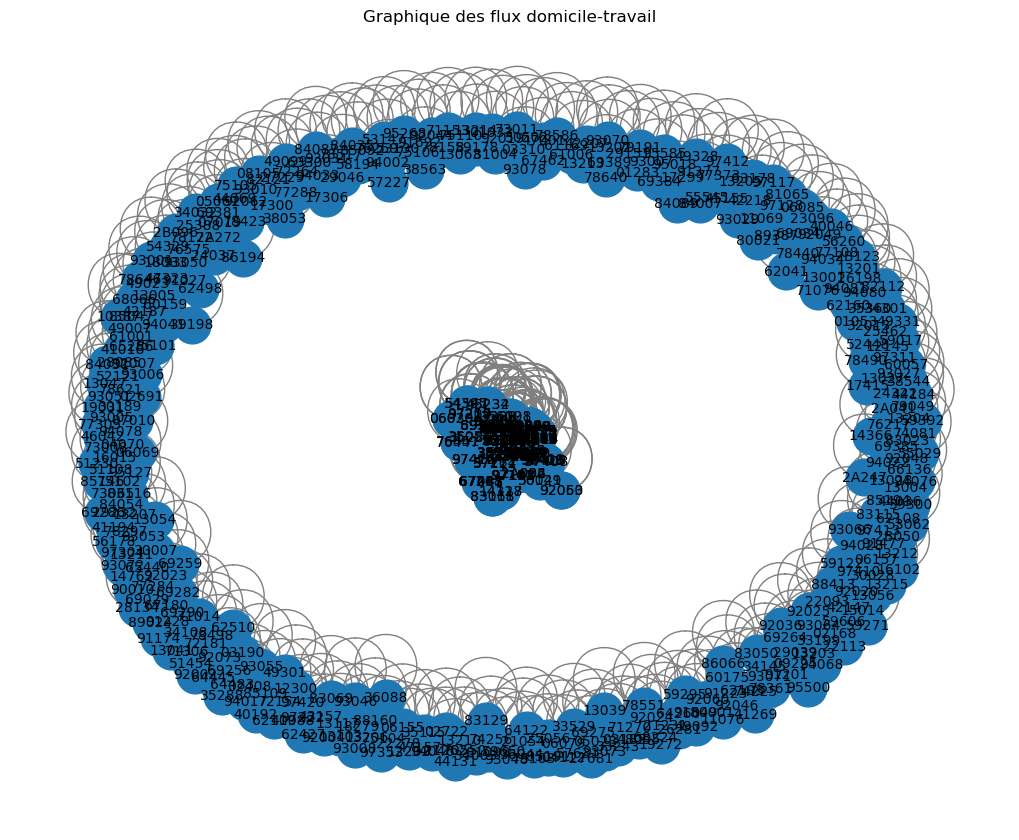

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe
G = nx.Graph()

# Ajouter les arêtes (villes liées par des flux)
for index, row in flux_tot.iterrows():
    for col, val in row.items():
        if val > 1000:  # Seulement si le flux est significatif
            G.add_edge(index, col, weight=val)

# Dessiner le graphe
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=700, font_size=10, edge_color='gray')

plt.title("Graphique des flux domicile-travail")
plt.show()


In [21]:
transport_dict = {
    1: "Pas de transport",
    2: "Marche à pied (ou rollers, patinette)",
    3: "Vélo (y compris à assistance électrique)",
    4: "Deux-roues motorisé",
    5: "Voiture, camion, fourgonnette",
    6: "Transports en commun"
}

Idée : 

Identification des zones à forte dépendance à la voiture

Estimation des émissions de CO₂ par trajet (introduire la distance entre les villes)

In [ ]:
df_mobpro_brut[df_mobpro_brut['TRANS']==6]

In [ ]:
df_meta_mobpro_brut[df_meta_mobpro_brut['COD_VAR']=='TRANS']